In [3]:
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd


In [4]:
sea.set_palette("muted")

In [21]:
data = pd.read_excel('C:/Users/user/Desktop/졸작/Steam게임데이타(Github)/Steam_game_data.xlsx',sheet_name='Steam_game_data')

In [32]:
data.columns

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

<Figure size 864x864 with 0 Axes>

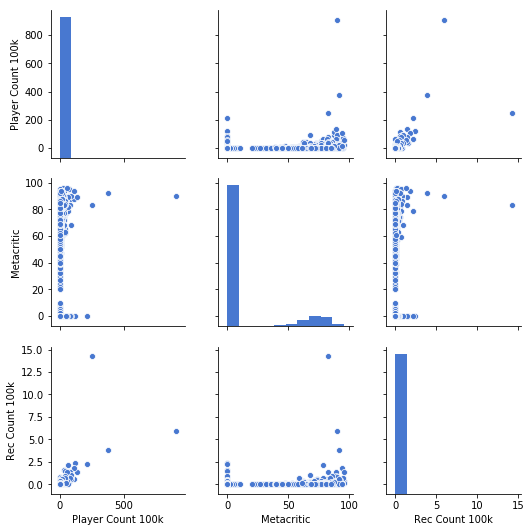

In [35]:
data["Rec Count 100k"] = data["RecommendationCount"] / 100000.0
data["Player Count 100k"] = data["SteamSpyPlayersEstimate"] / 100000.0

INTERESTING_NUMERICS = [
    "Player Count 100k",
    "Metacritic",
    "Rec Count 100k"    
]

plt.figure(figsize=(12,12));
sea.pairplot(data[INTERESTING_NUMERICS]);
plt.savefig("C:/Users/user/Desktop/졸작/Steam게임데이타(Github)/numeric-data4.png",bbox_inches='tight');


In [47]:
class PER:
    def __init__(self, per):
        self.per = per

def see_one(name, nonzero=True, bound=None, ax=None):
    print(name)
    d = data
 
    
    if nonzero:
        d = [d[d[name] > 0.0]
        
    if bound:
        if isinstance(bound, PER):
            max_index = int(len(d[name]) * bound.per)
            bound = d[name].copy().sort_values().head(max_index).values[-1]
            print("Using upper bound",bound)
        d = d[d[name] < bound]
    
    d =d[name]
    
    print(d.describe())
    print('-'*20)
    if ax is None:
        plt.figure()
    sea.distplot(d, kde=True, rug=False, ax=ax)

fig, axes = plt.subplots(1, 2, figsize=(12,4));
for ax, col in zip(axes.flatten(), ["SteamSpyPlayersEstimate","RecommendationCount"]):
    see_one(col, nonzero=True, bound=PER(0.90), ax=ax)
plt.savefig("C:/Users/user/Desktop/졸작/Steam게임데이타(Github)/player_count_recommends_distribution.png", bbox_inches='tight');

fig, axes = plt.subplots(1, 2, figsize=(12,4));
for ax, col in zip(axes.flatten(), ["PriceFinal","PriceInitial"]):
    see_one(col, nonzero=True, bound=PER(0.90), ax=ax)
    

SyntaxError: invalid syntax (<ipython-input-47-73279eb565db>, line 13)

SteamSpyPlayersEstimate
Using upper bound 209301.0
count      9320.000000
mean      24924.678326
std       40458.425480
min         533.000000
25%        1793.000000
50%        6995.000000
75%       27082.000000
max      208942.000000
Name: SteamSpyPlayersEstimate, dtype: float64
--------------------
RecommendationCount
Using upper bound 5314.0
count    4415.000000
mean      772.223103
std       978.235431
min         1.000000
25%       181.000000
50%       359.000000
75%       889.000000
max      5272.000000
Name: RecommendationCount, dtype: float64
--------------------


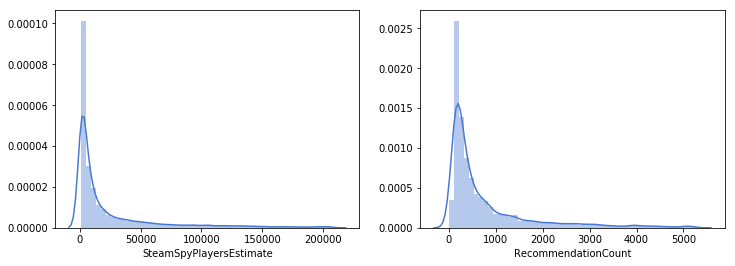

In [60]:
class PER:
    def __init__(self, per):
        self.per = per


def see_one(name, nonzero=True, bound=None, ax=None):
    
    print(name)
    d = data
    
    if nonzero:
        d = d[d[name] > 0.0]
    
    if bound:
        if isinstance(bound, PER):
            max_index = int(len(d[name]) * bound.per)
            bound = d[name].copy().sort_values().head(max_index).values[-1]
            print("Using upper bound", bound)
        d = d[d[name] < bound]
    
    d = d[name]
    
    print(d.describe())
    print('-'*20)
    
    if ax is None:
        plt.figure()
    sea.distplot(d, kde=True, rug=False, ax=ax)

fig, axes = plt.subplots(1, 2, figsize=(12,4));

for ax, col in zip(axes.flatten(), ["SteamSpyPlayersEstimate", "RecommendationCount"]):
    see_one(col, nonzero=True, bound=PER(0.90), ax=ax)
plt.savefig("C:/Users/user/Desktop/졸작/Steam게임데이타(Github)/player_count_recommends_distribution2.png", bbox_inches='tight');
    
#fig, axes = plt.subplots(1, 2, figsize=(12,4));
#
#for ax, col in zip(axes.flatten(), ["PriceFinal", "PriceInitial"]):
#    see_one(col, nonzero=True, bound=PER(0.90), ax=ax)
#plt.savefig("C:/Users/user/Desktop/졸작/Steam게임데이타(Github)/player_count_recommends_distribution3.png", bbox_inches='tight');


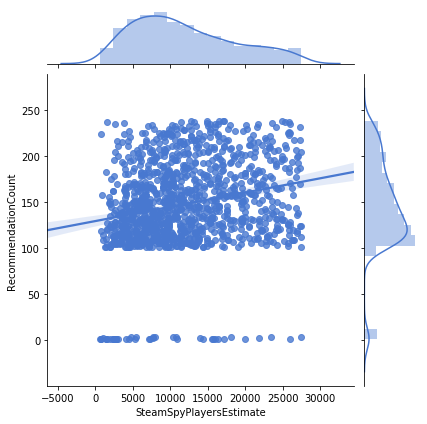

In [61]:
rec_num = data[["RecommendationCount", "SteamSpyPlayersEstimate"]].copy()

def get_bound(name):
    max_index = int(len(rec_num[name]) * 0.75)
    bound = rec_num[name].copy().sort_values().head(max_index).values[-1]
    return bound

def one_filt(src,name):
    return src[ (src[name] > 0) & (src[name] < get_bound(name)) ]

to_check = one_filt(one_filt(rec_num, "RecommendationCount"), "SteamSpyPlayersEstimate")
sea.jointplot("SteamSpyPlayersEstimate", "RecommendationCount", data=to_check, kind="reg");
plt.savefig("C:/Users/user/Desktop/졸작/Steam게임데이타(Github)/player-count-recommends-jointwithreg.png", bbox_inches='tight');